# Pychenette n° 2 : Visualiser une hiérarchie de classes

**Pychenette** est une série de notebooks, en français, courts et originaux avec Python.

**Auteur** : Francis Wolinski

Pour tout commentaire : pychenette[at]yotta-conseil.fr

#### L'idée de ce notebook

Python est un langage à objets supportant l'héritage des classes. L'idée de ce notebook est de visualiser une hiérarchie de classes sous la forme d'un arbre, voire un graphe, puisque le langage supporte l'héritage multiple.

<a href="notebooks/Pychenette-2-Visualiser-une-hierarchie-de-classes.ipynb">Accès au notebook</a>

<a href="https://pychenette.yotta-conseil.fr/"><i class="fa fa-home"></i></a>

In [1]:
# imports
from IPython.display import Image, display

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

### Exploration de la hiérarchie des classes d'index de la librairie pandas

Il existe un certain nombre de classes d'index dans la librairie **pandas** qui confèrent aux objets de type `Series` et `DataFrame` des comportements spécifiques.

Par exemple, l'opérateur `loc["MM/AAAA"]` avec un index de type `DatetimeIndex`, ou bien la méthode `resample()` avec un index de type `DatetimeIndex` ou `TimedeltaIndex`.

On peut utiliser les capacités instrospectives de Python pour explorer les sous-classes d'index.

In [2]:
def tree_class(cls, shift=0):
    print("\t" * shift, cls.__name__)
    for c in cls.__subclasses__():
        tree_class(c, shift+1)

tree_class(pd.Index)

 Index
	 ExtensionIndex
		 NDArrayBackedExtensionIndex
			 CategoricalIndex
			 DatetimeIndexOpsMixin
				 DatetimeTimedeltaMixin
					 DatetimeIndex
					 TimedeltaIndex
				 PeriodIndex
		 IntervalIndex
	 NumericIndex
		 IntegerIndex
			 Int64Index
			 UInt64Index
		 Float64Index
		 RangeIndex
	 MultiIndex


### Visualisation de l'héritagle des classes d'index

On va utiliser la librairie `NextworkX` pour mieux visualiser cette hiérarchie. On utilise la classe `DiGraph` qui permet de représenter des graphes orientés. La librairie produit un graphique en s'appuyant sur Pydot et Graphviz.

Dans le graphique produit, on distingue les classes concrètes et les classes abstraites. Cette visualisation permet de constater la richesse des classes d'index de la librairie **pandas**.

In [3]:
g = nx.DiGraph()

def make_graph(cls, g):
    for c in cls.__subclasses__():
        g.add_edge(cls.__name__, c.__name__)
        make_graph(c, g)
        
make_graph(pd.Index, g)

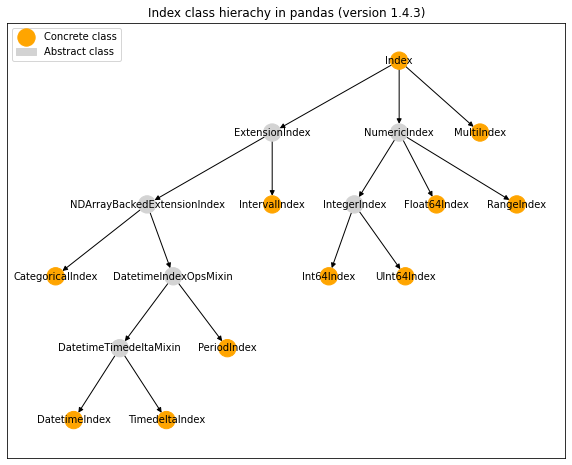

In [4]:
concrete_color = "orange"
abstract_color = "lightgrey"
concrete_classes = [
    'Index',
    'CategoricalIndex',
    'DatetimeIndex',
    'TimedeltaIndex',
    'PeriodIndex',
    'IntervalIndex',
    'Int64Index',
    'RangeIndex',
    'UInt64Index',
    'Float64Index',
    'MultiIndex',
]
colors = [concrete_color if c in concrete_classes else abstract_color for c in list(g)]

# positions
pos = graphviz_layout(g, prog="dot")

# graphics
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.set_title(f"Index class hierachy in pandas (version {pd.__version__})")
nx.draw_networkx(g, arrows=True, pos=pos, node_color=colors, font_size=10, ax=ax)
legend = ax.legend(["Concrete class", "Abstract class"], loc="upper left")
legend.legendHandles[0].set_color(concrete_color)
legend.legendHandles[1].set_color(abstract_color)
fig.savefig(f"index_class_hierachy_in_pandas_version_{pd.__version__}.png", dpi=300, bbox_inches="tight")

### Evolution de la hiérarchie des classes d'index de la librairie pandas

En fait, cette hiérarchie n'est pas figée et a évolué au fil des versions de **pandas**.

On trouvera ci-dessous la visualisation pour les versions 1.0, 1.1, 1.2 et 1.3 de **pandas**.

On constate une simplification de la hiérarchie des classes d'index avec un abandon progressif de l'héritage multiple pour les classes `PeriodIndex` et `DatetimeIndexOpsMixin`.

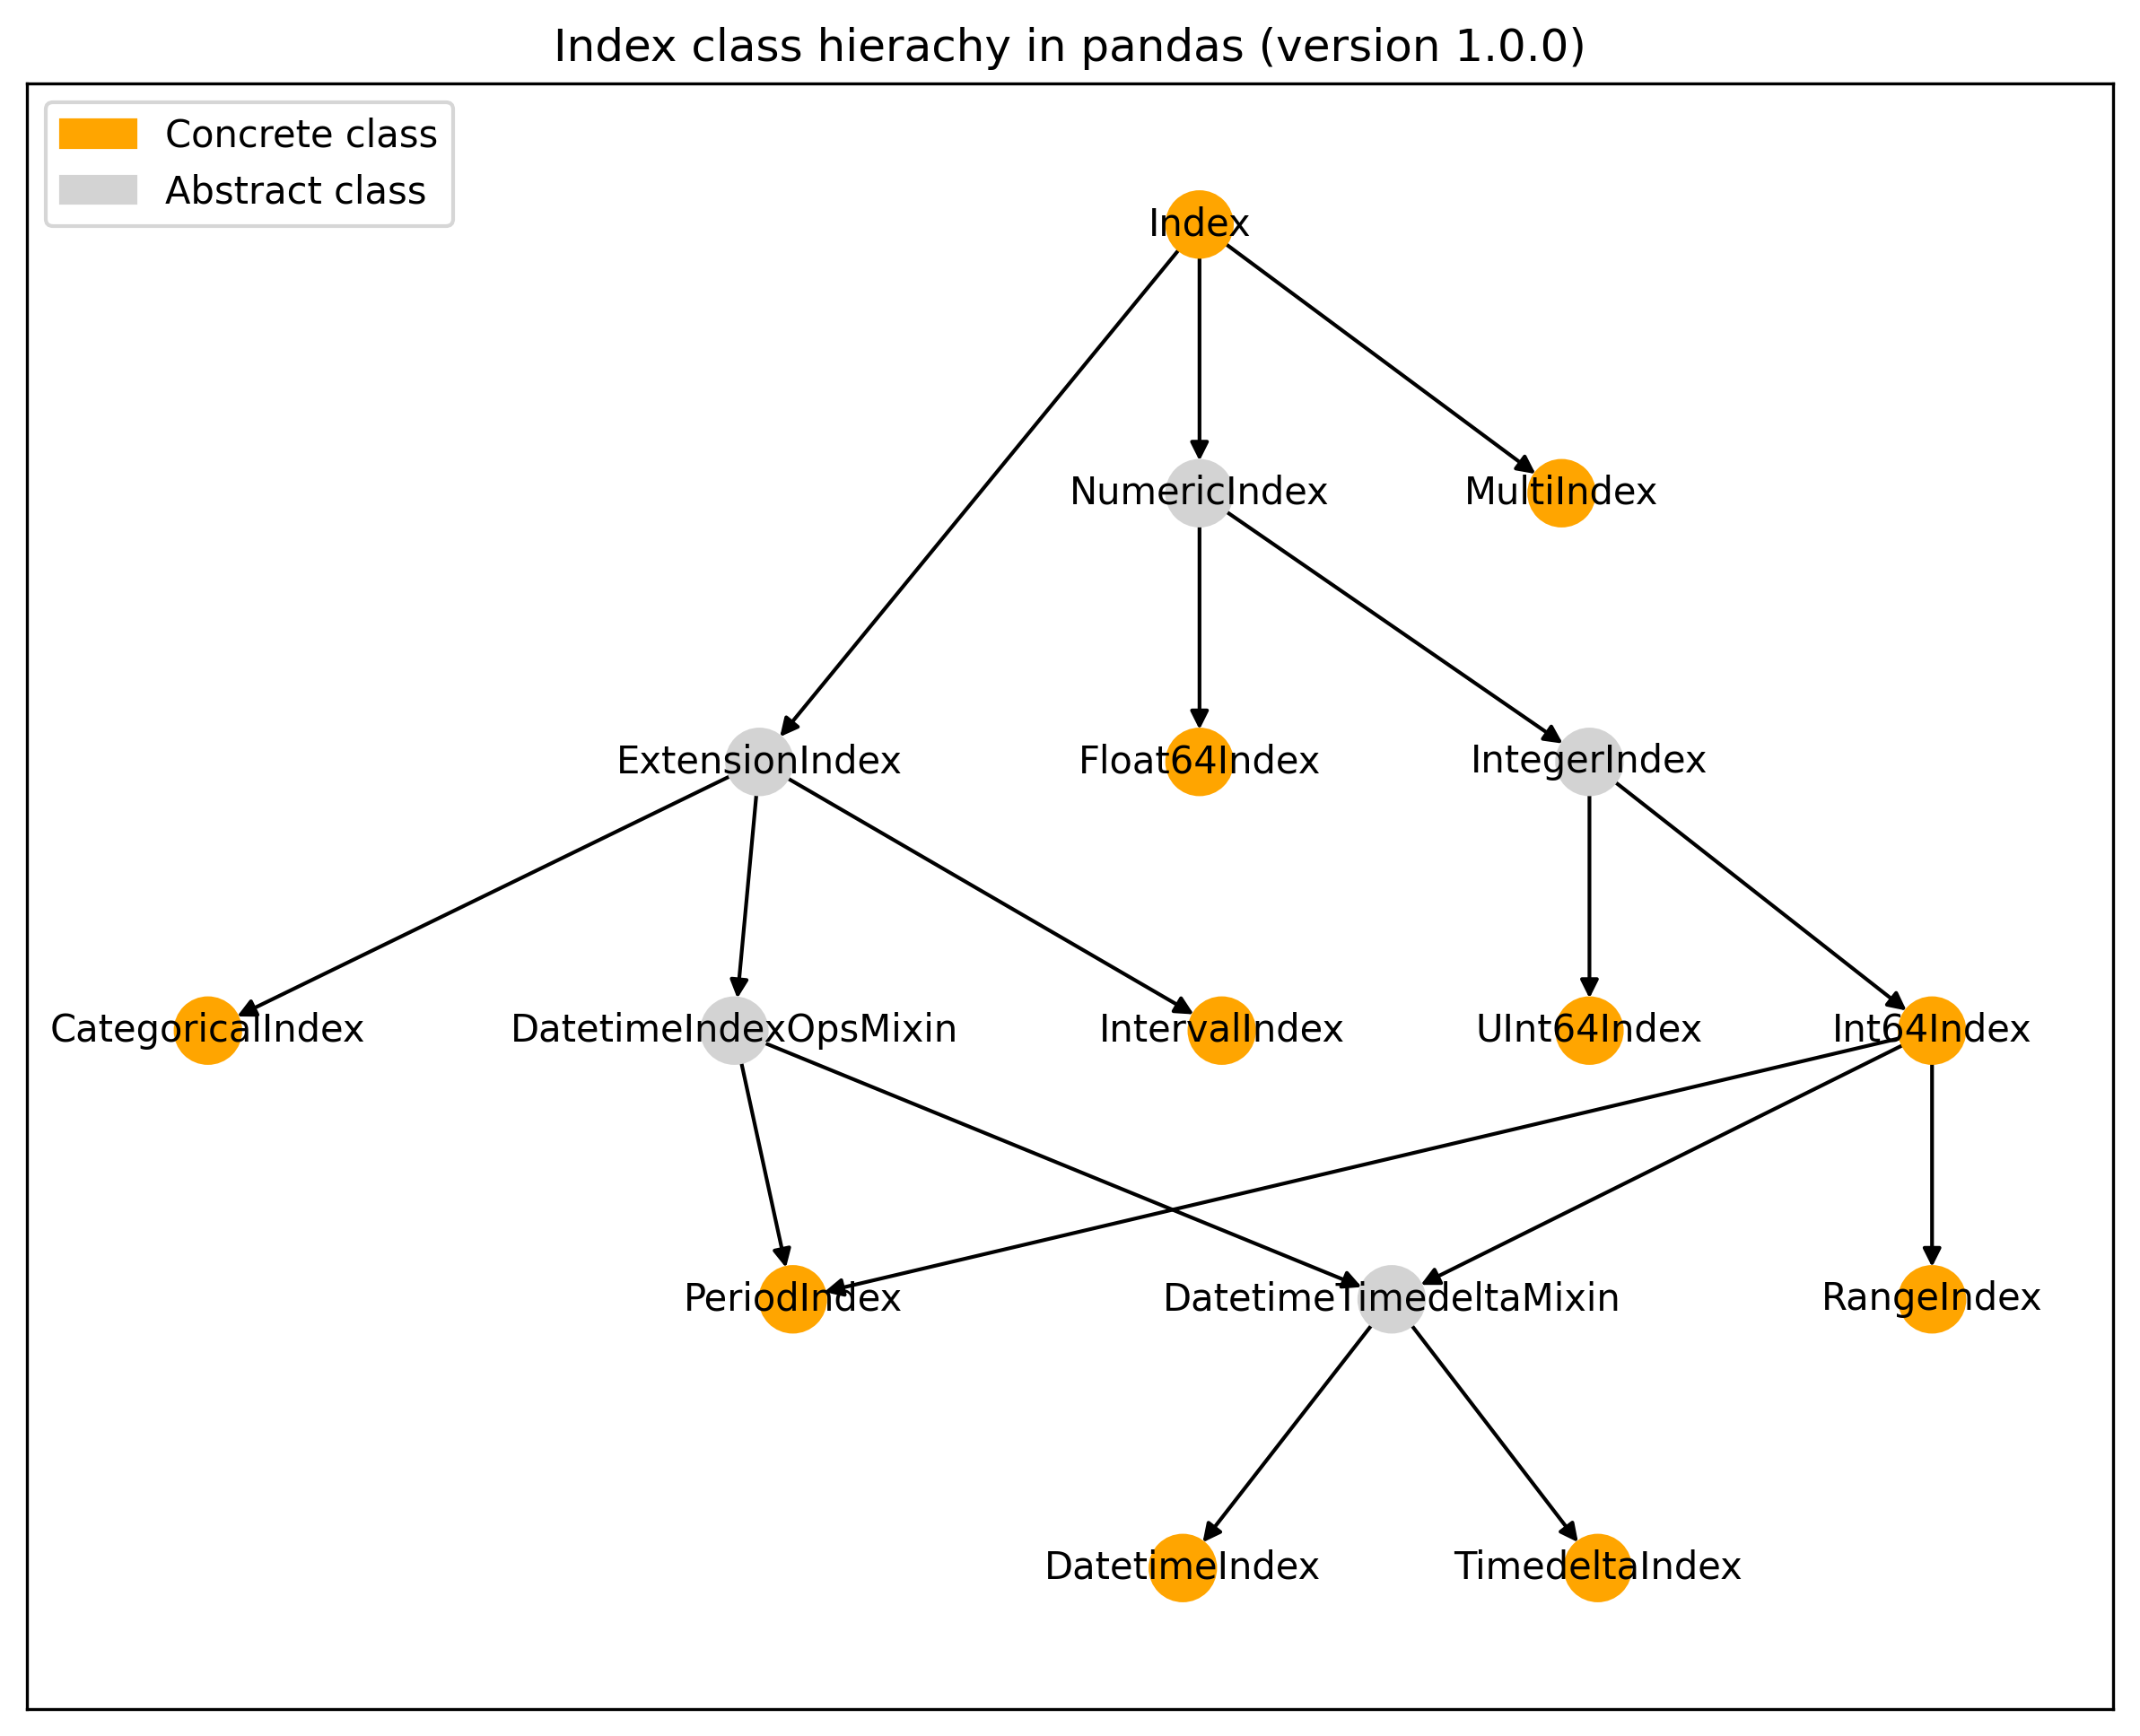

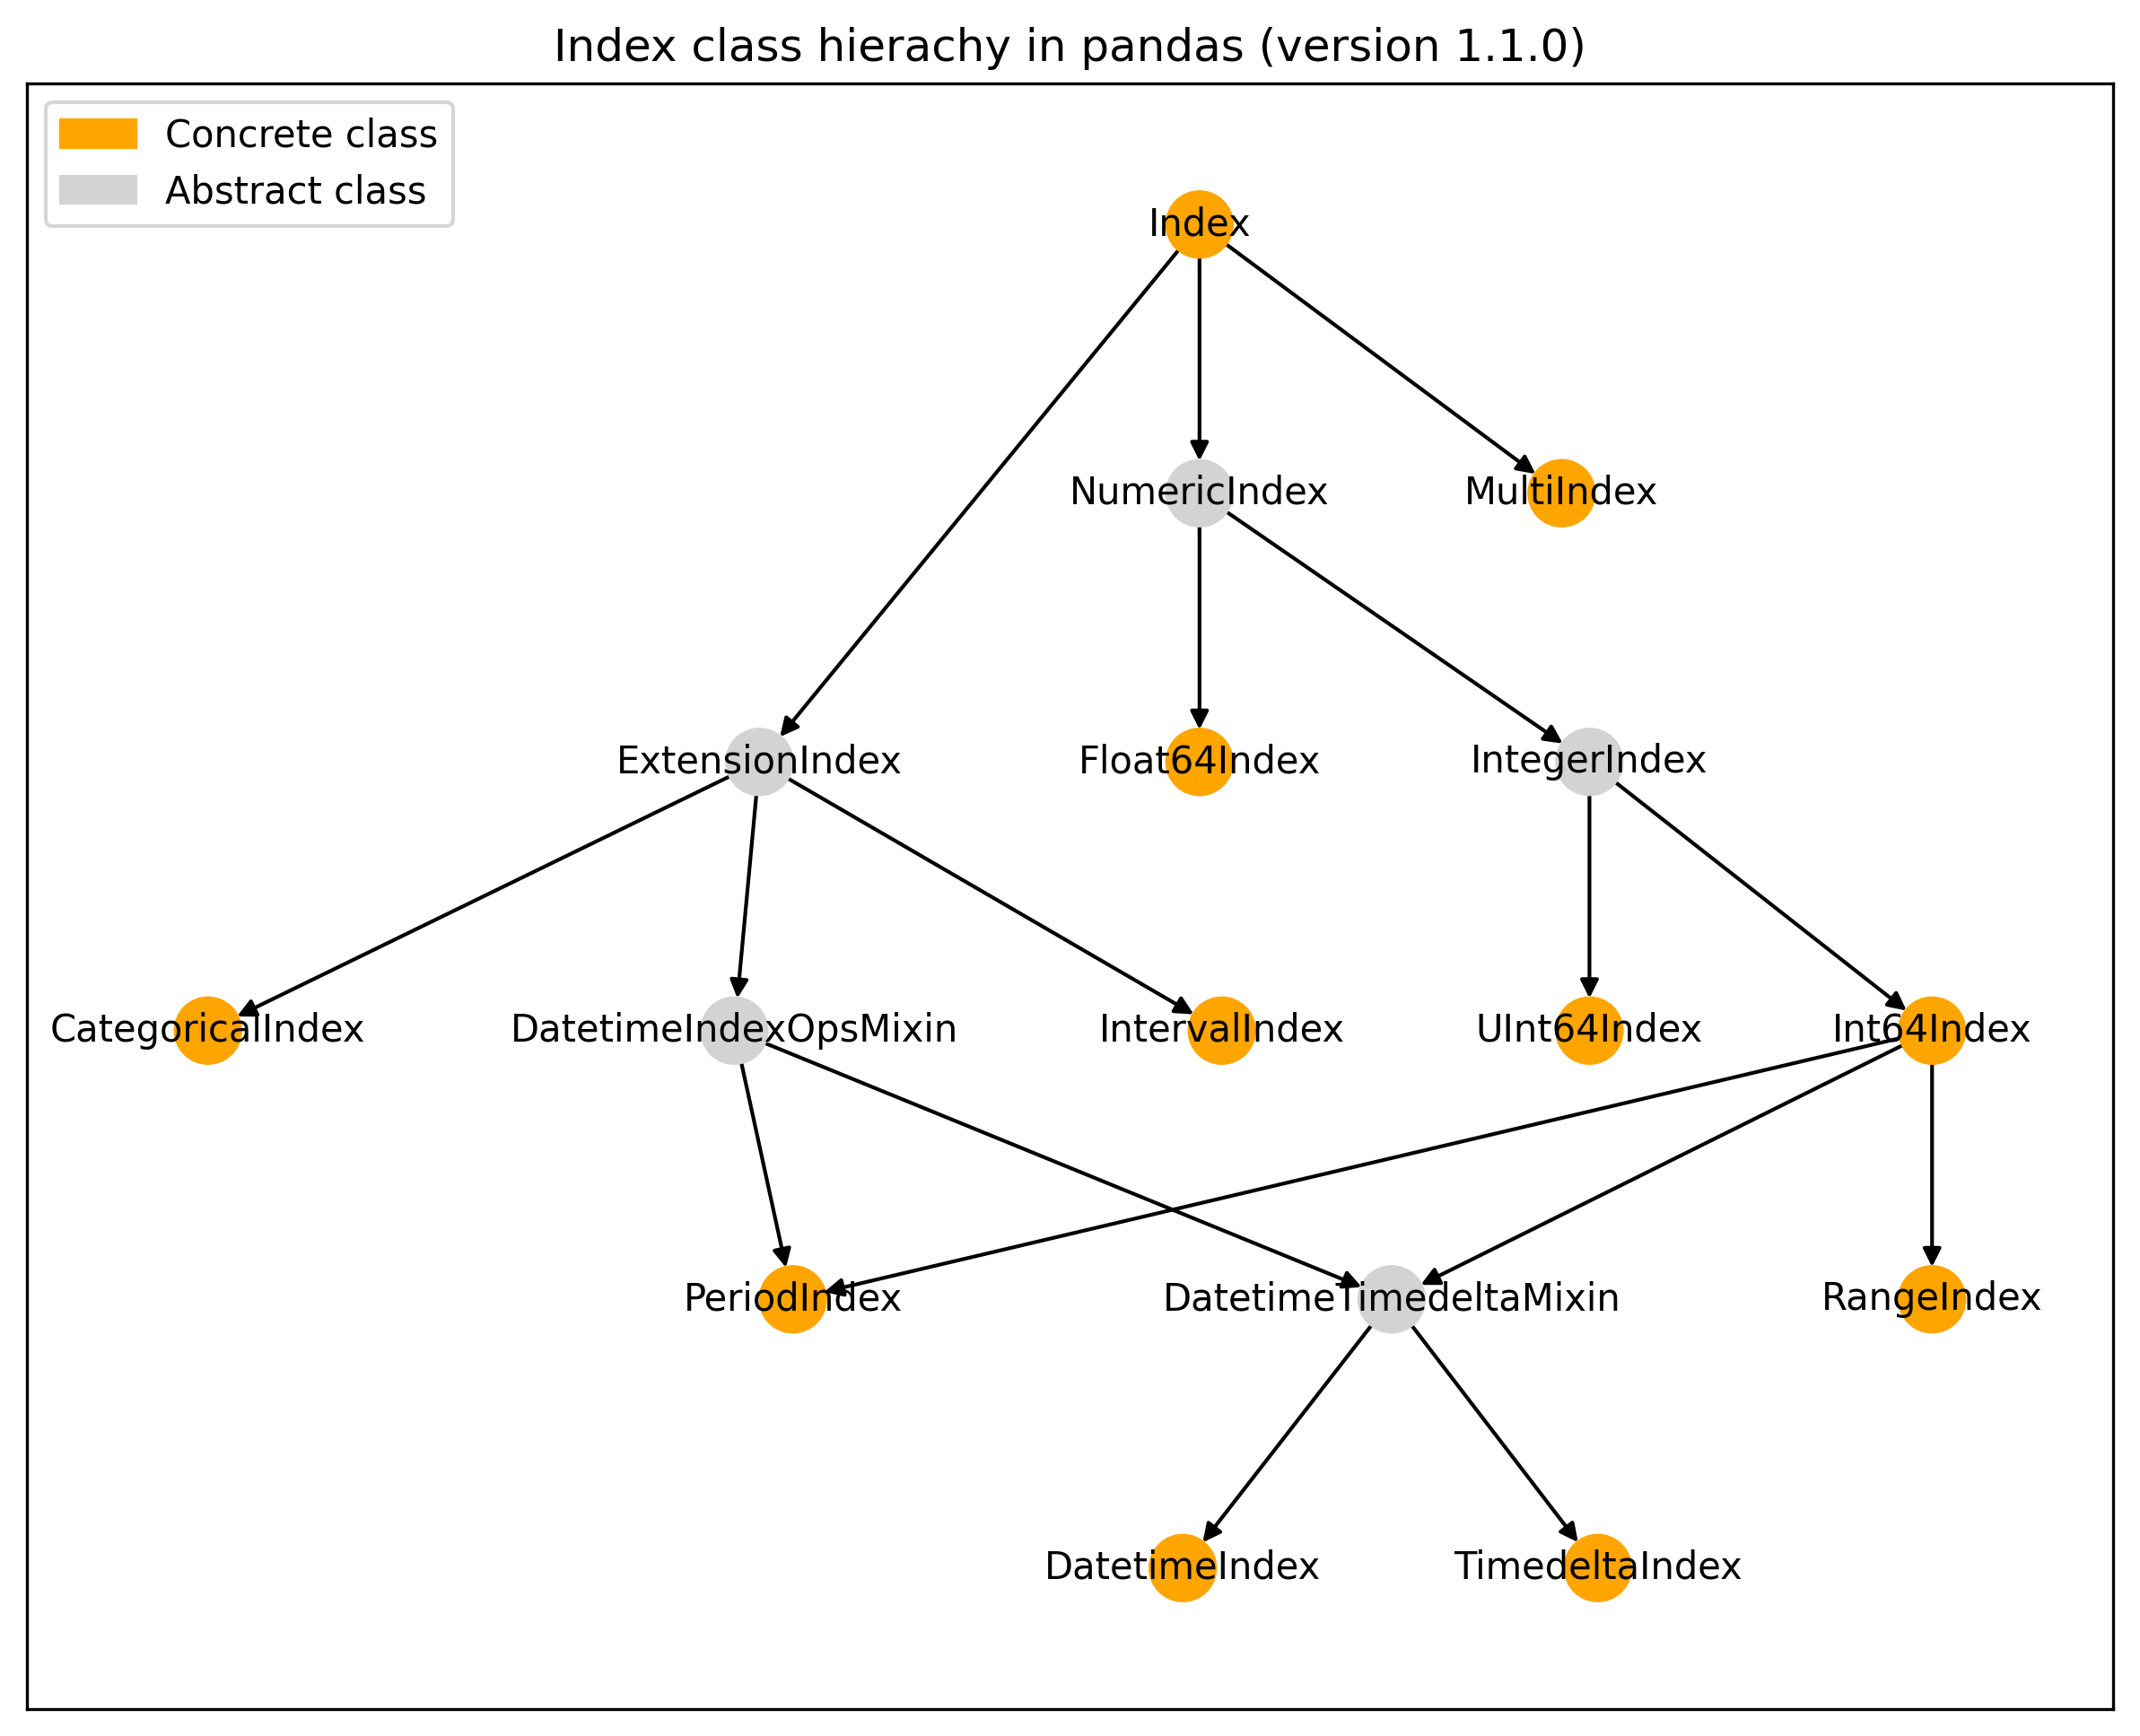

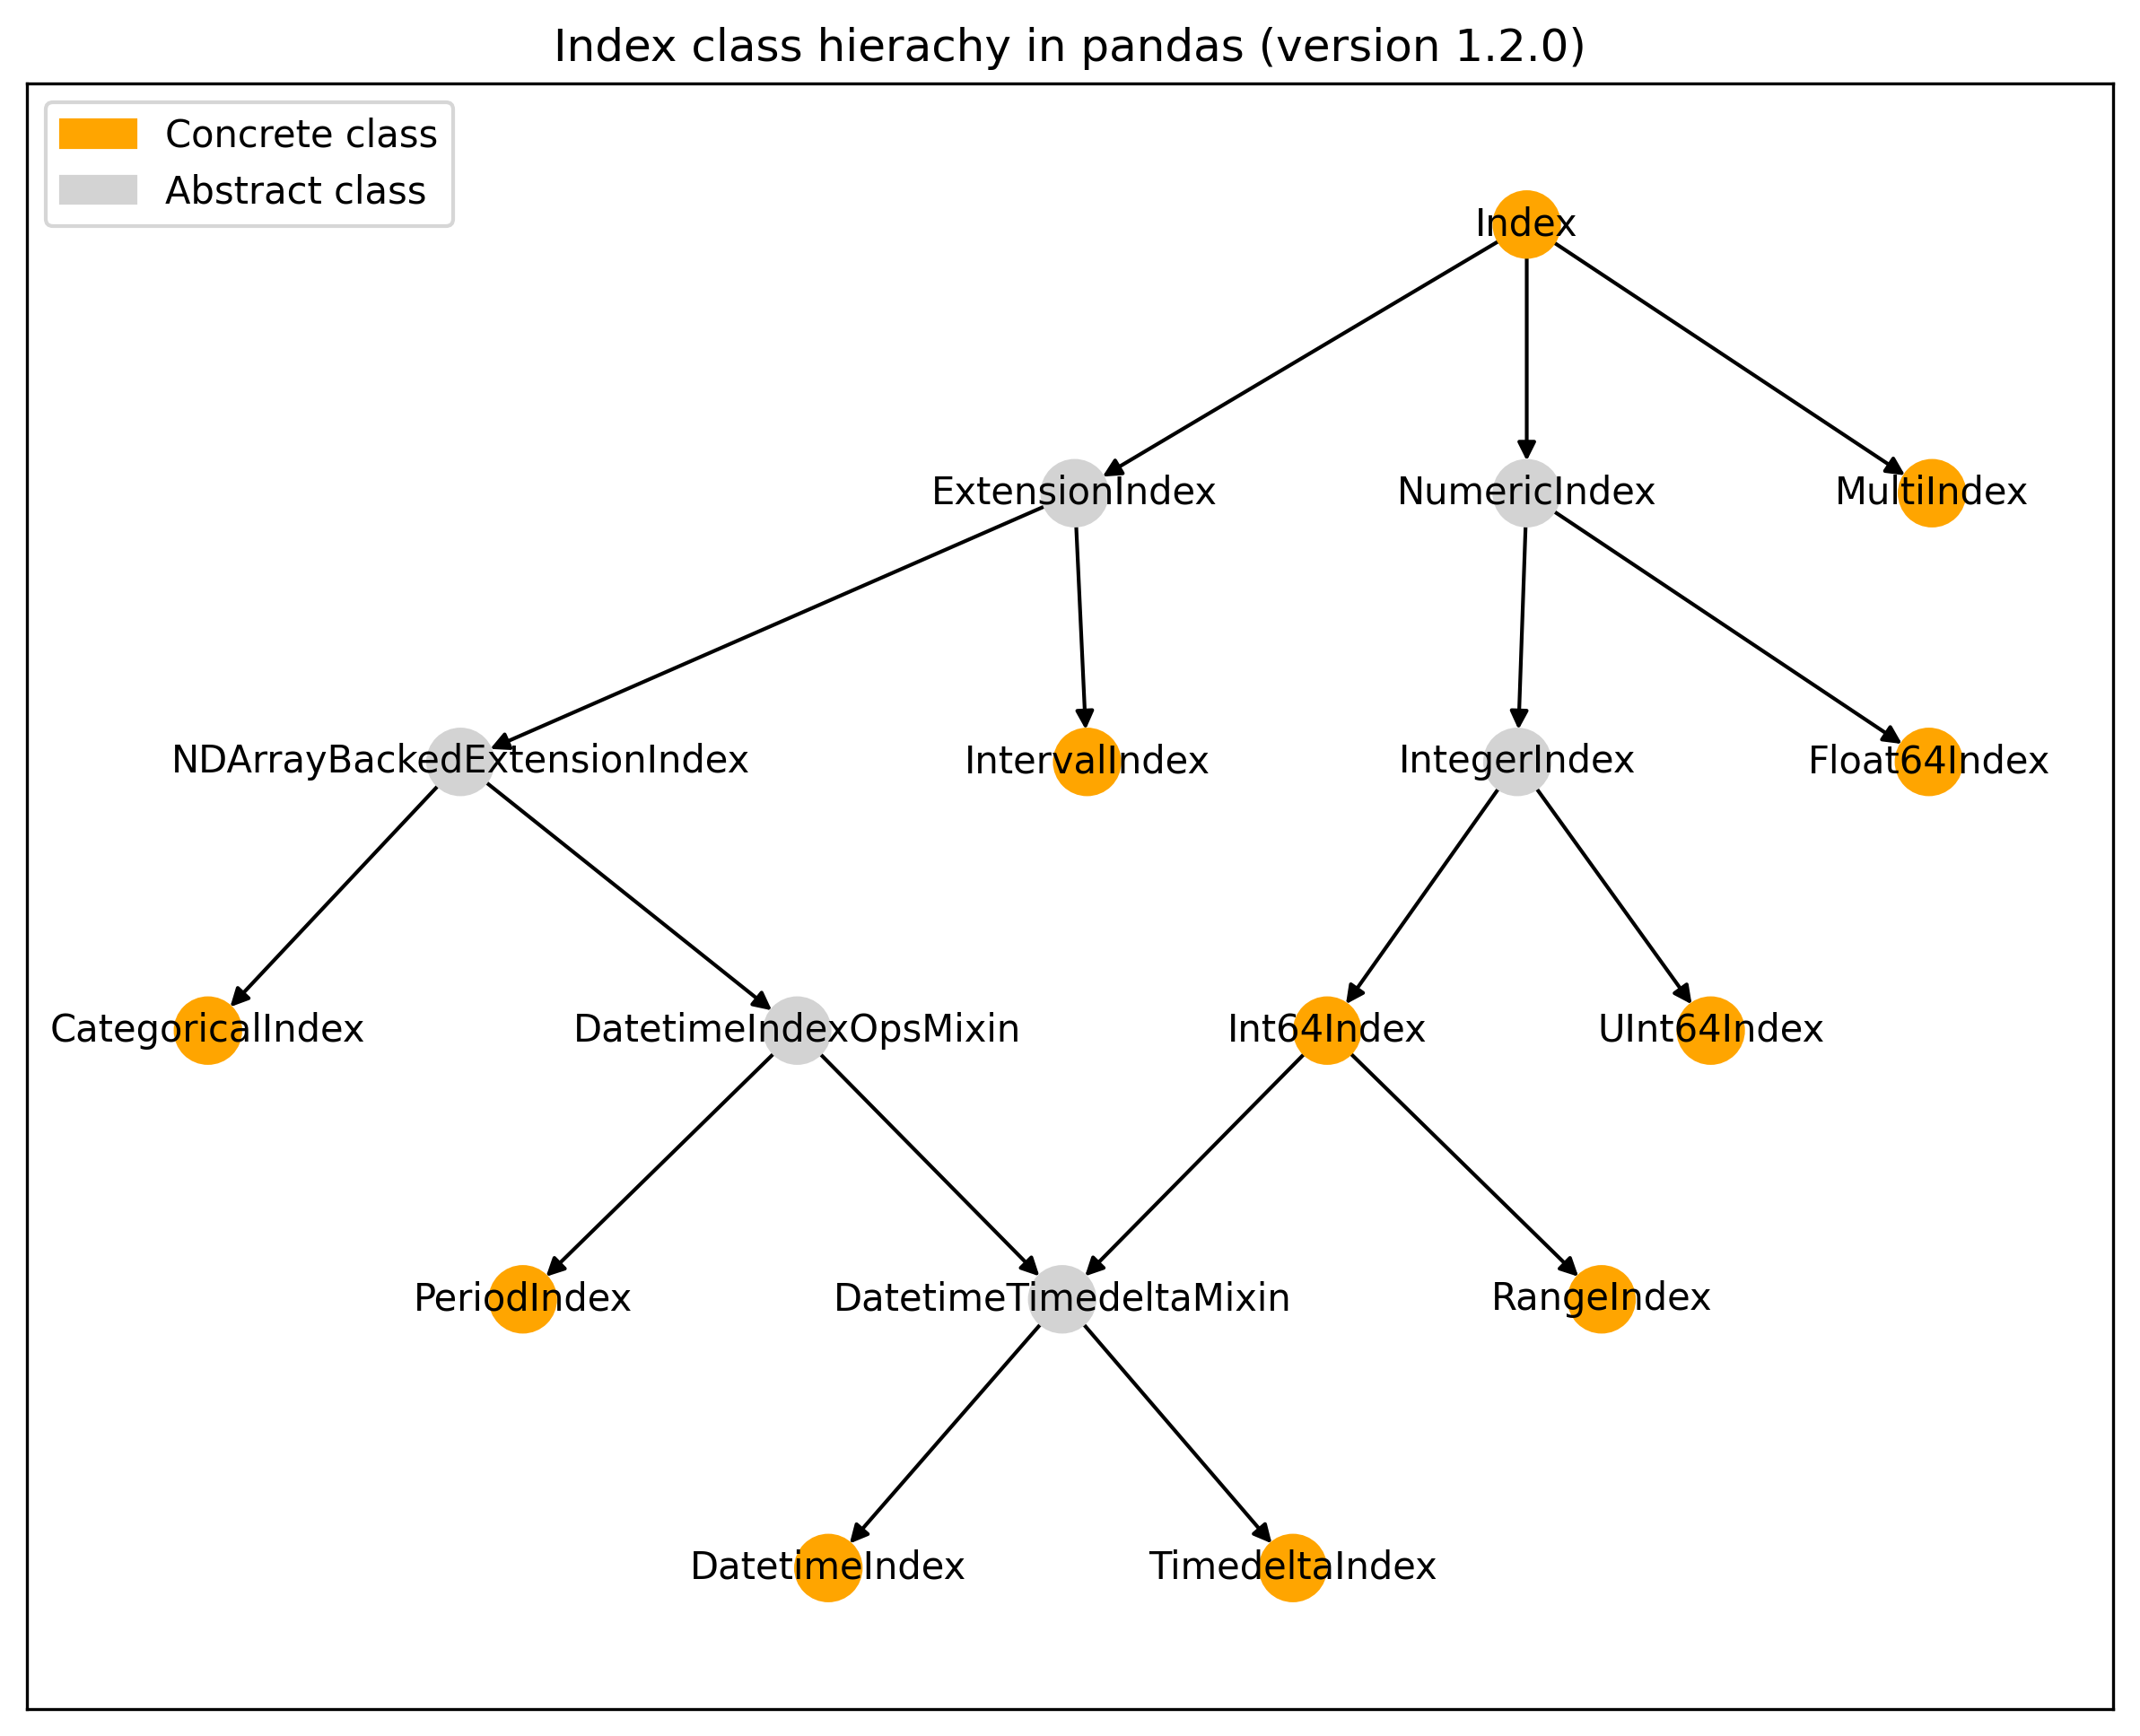

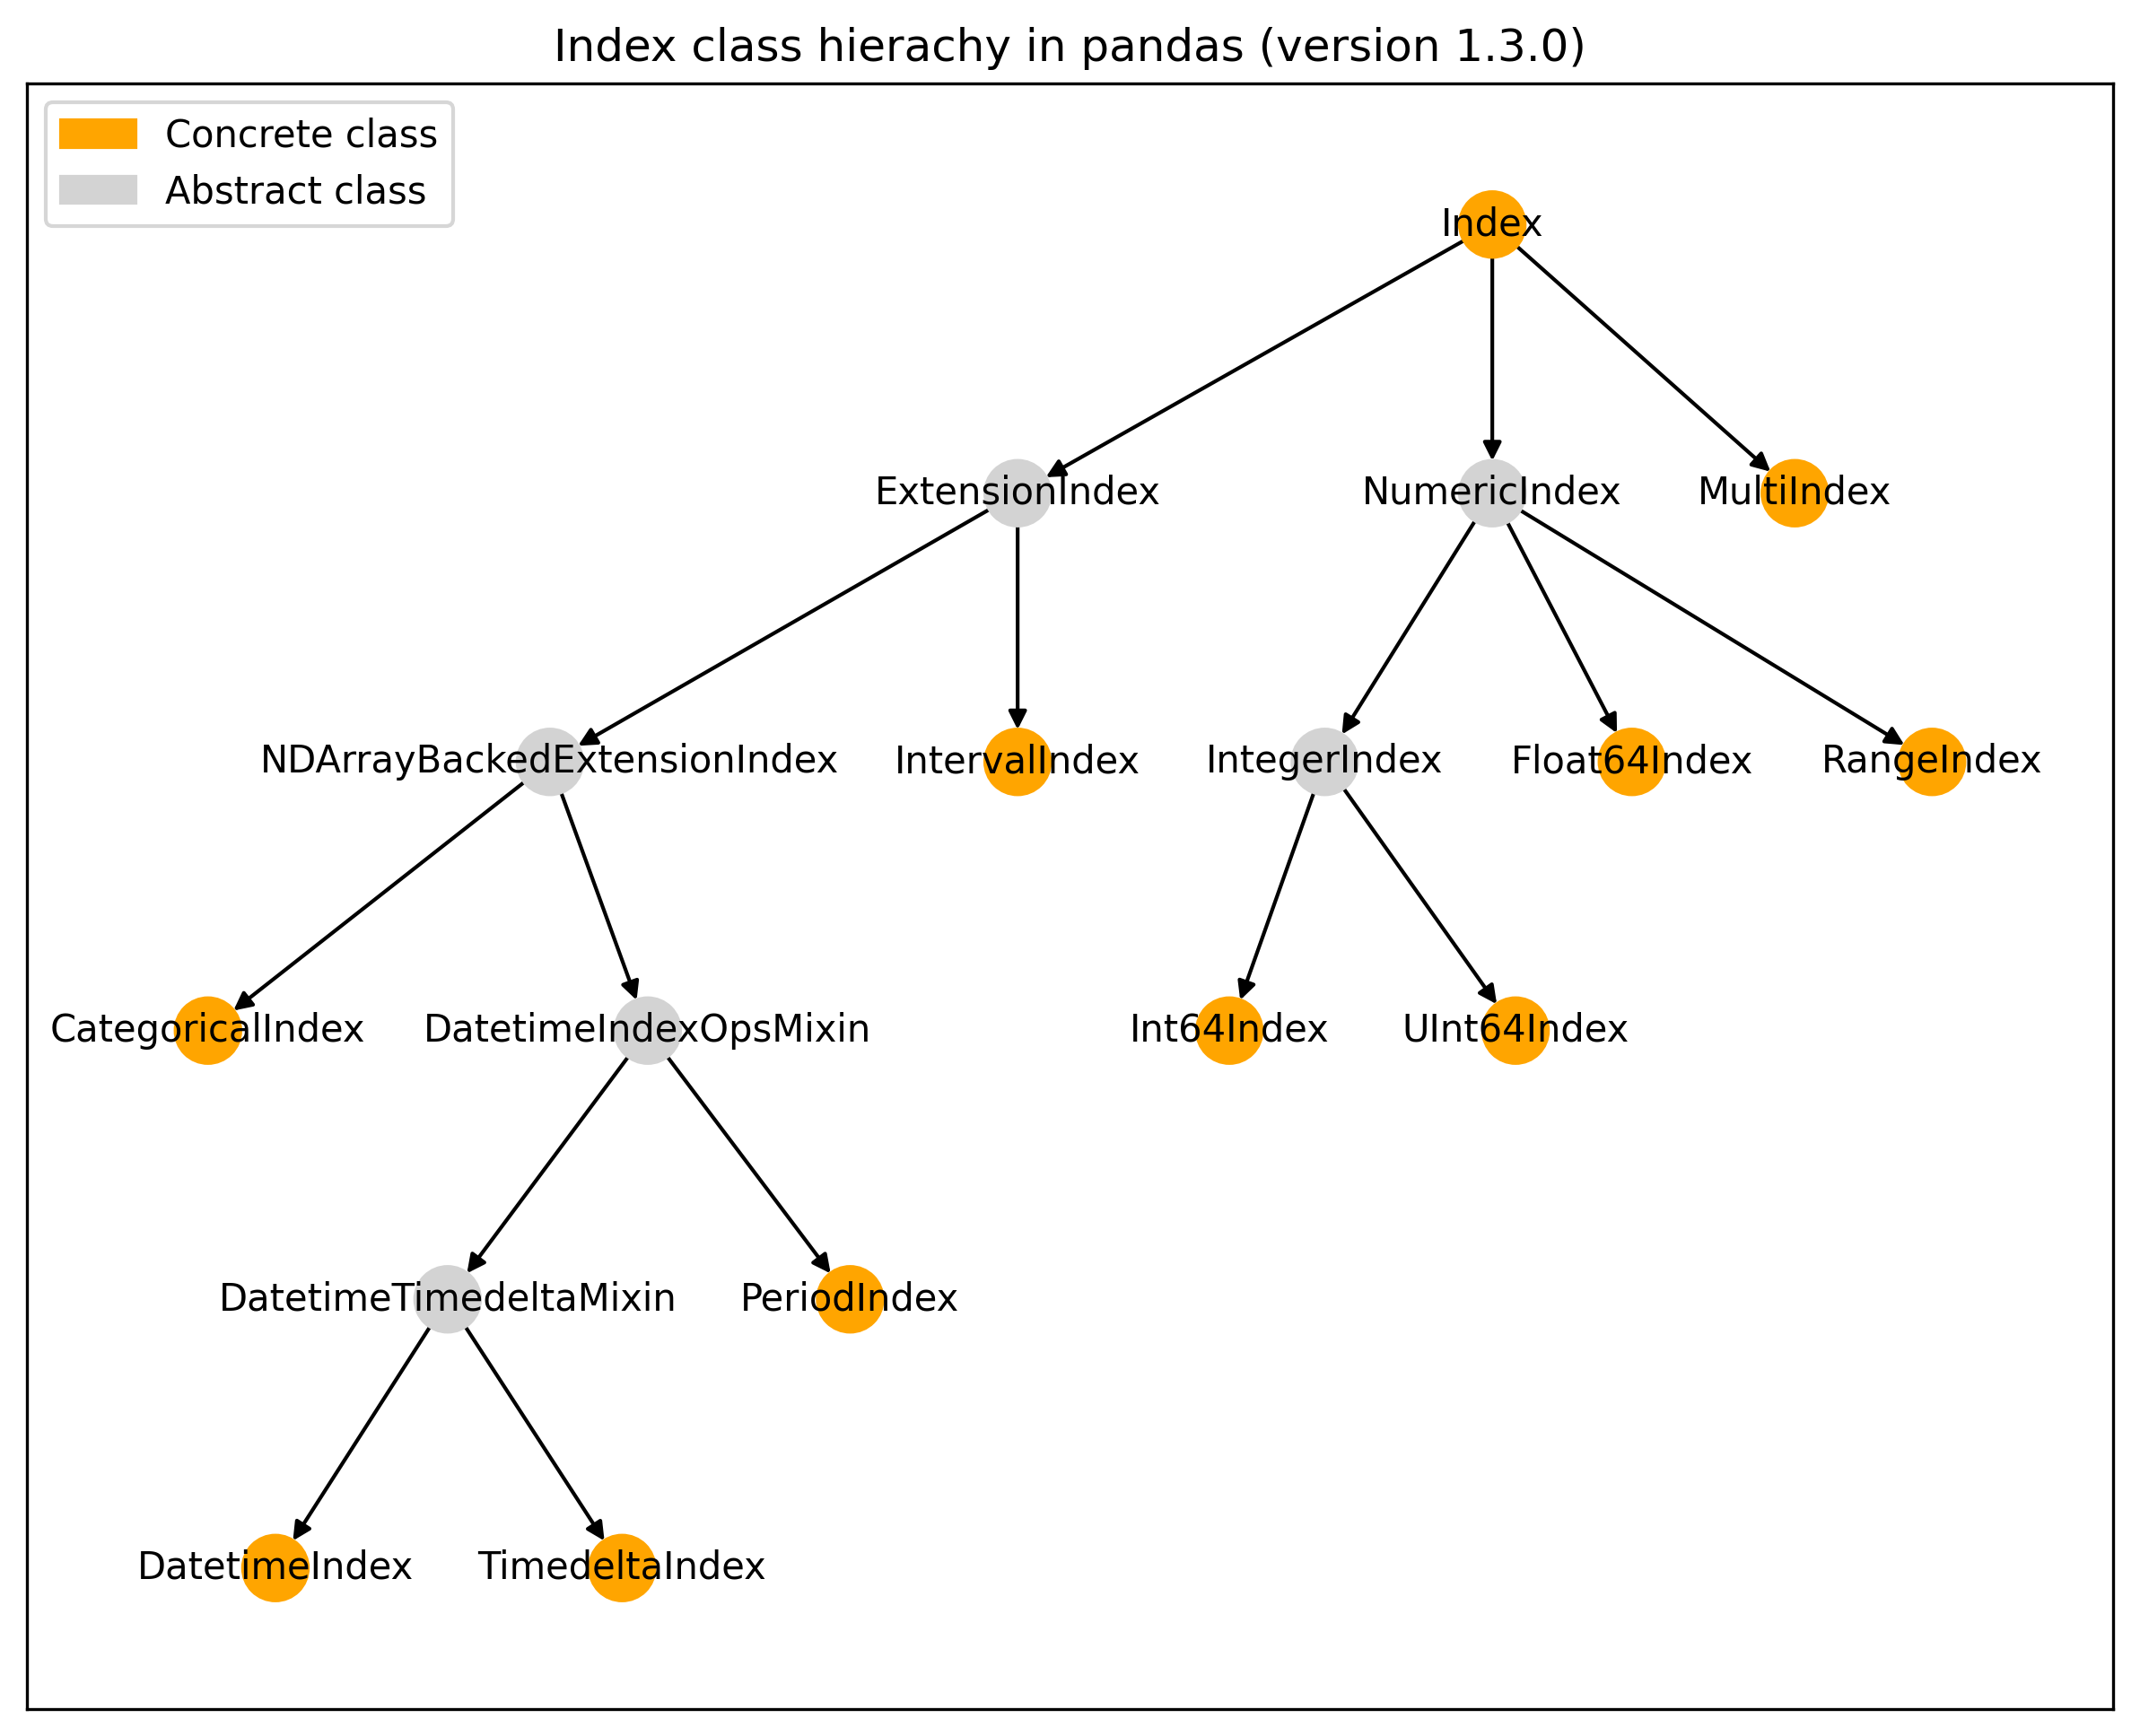

In [5]:
for v in range(4):
    im = Image(f"index_class_hierachy_in_pandas_version_1.{v}.0.png", width=600, height=500)
    display(im)